In [6]:
import sys
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import numpy as np
import cv2
import face_detection
import time

In [7]:
print(sys.version)
print(np.__version__)
print(tf.__version__)
print(torch.__version__)
print(cv2.__version__)

3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]
1.26.4
2.10.1
2.4.0
4.10.0


Processing: ../minidataset/image020.jpg
Detection time: 4.313 seconds
Total faces: 52


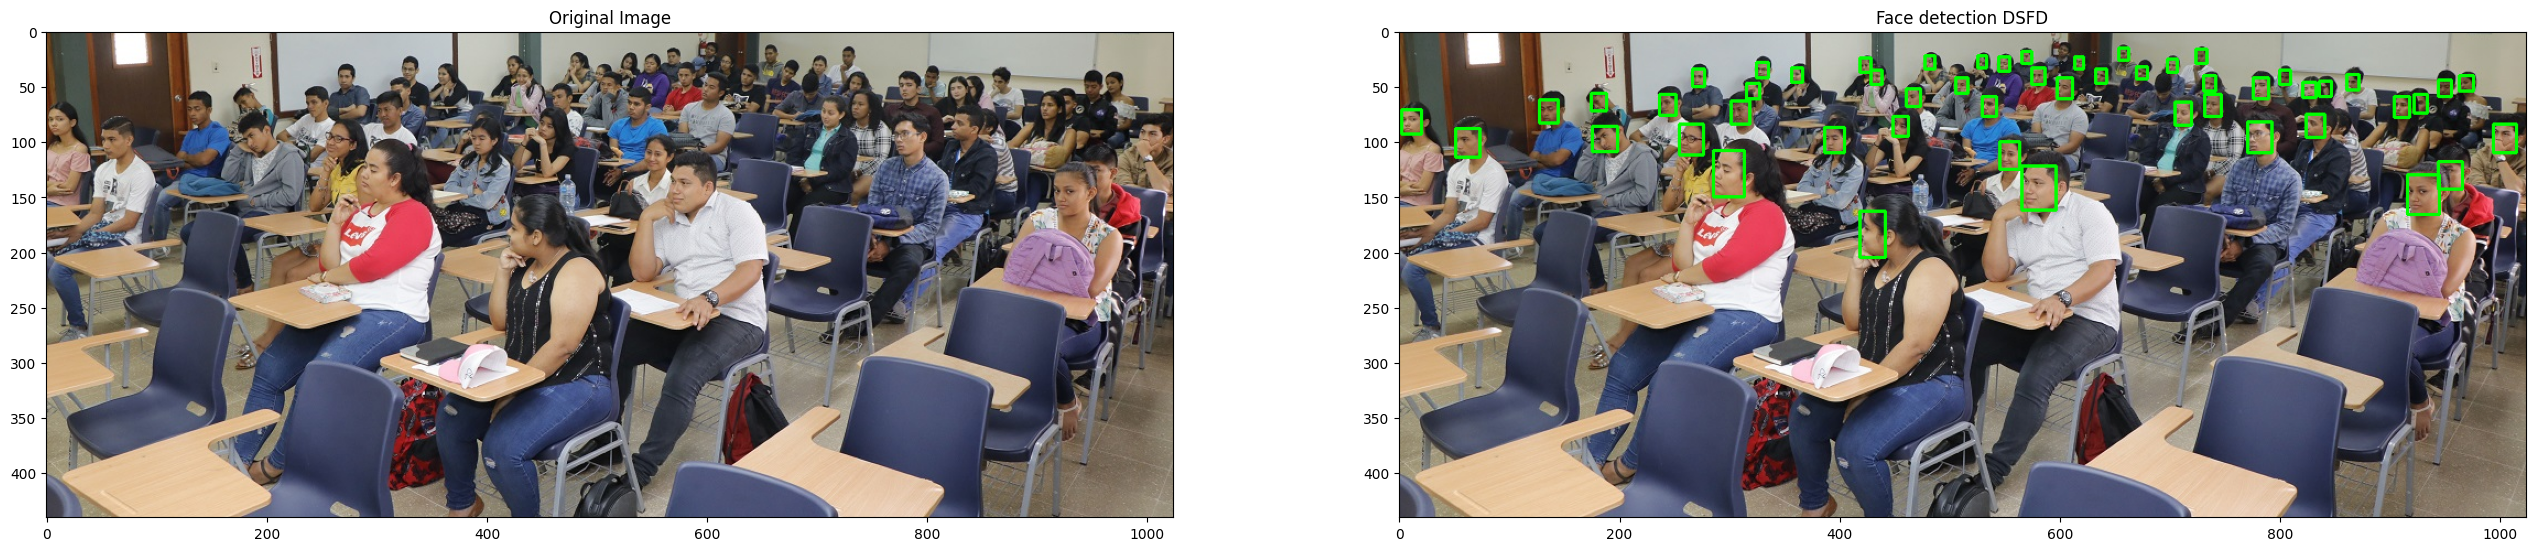

In [10]:
# Ruta de la imagen que quieres procesar
imgpath = '../minidataset/image020.jpg' #'../sampledata/crowds/group-people.jpg'

# Leer la imagen
image = cv2.imread(imgpath)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

# Mostrar la imagen original
plt.figure(figsize=(32, 32))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('on')

# Construir el detector DSFD
detector = face_detection.build_detector(
    "DSFDDetector",
    max_resolution=None
)

# Detectar los rostros en la imagen
print("Processing:", imgpath)
t = time.time()
dets = detector.detect(image[:, :, ::-1])[:, :4]  # Detección
total_faces = len(dets)
print(f"Detection time: {time.time()- t:.3f} seconds")
print(f"Total faces: {total_faces}")

# Dibujar las caras detectadas
for bbox in dets:
    x0, y0, x1, y1 = [int(_) for _ in bbox]
    cv2.rectangle(image, (x0, y0), (x1, y1), (0, 255, 0), 2)  # Color verde para las cajas

# Convertir la imagen con las cajas delimitadoras a RGB para mostrarla con matplotlib
img_rgb_with_boxes_dsfd = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rostros detectados
plt.subplot(1, 2, 2)
plt.imshow(img_rgb_with_boxes_dsfd)
plt.title('Face detection DSFD')
plt.axis('on')
plt.show()

Detection time: 4.020 seconds


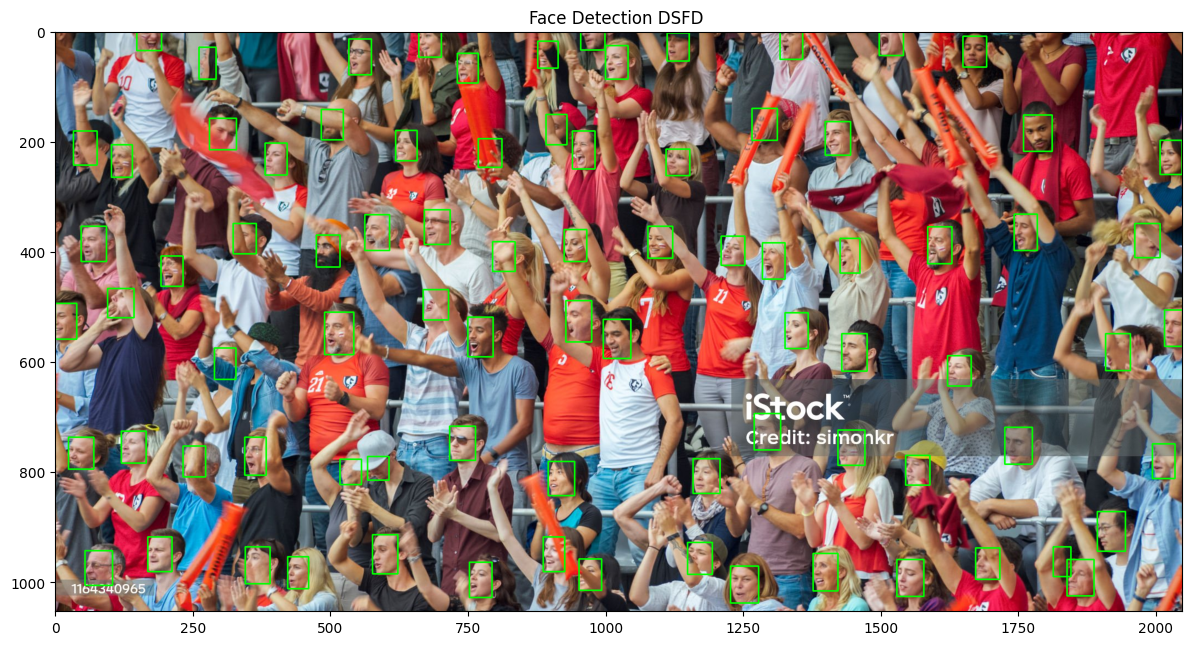

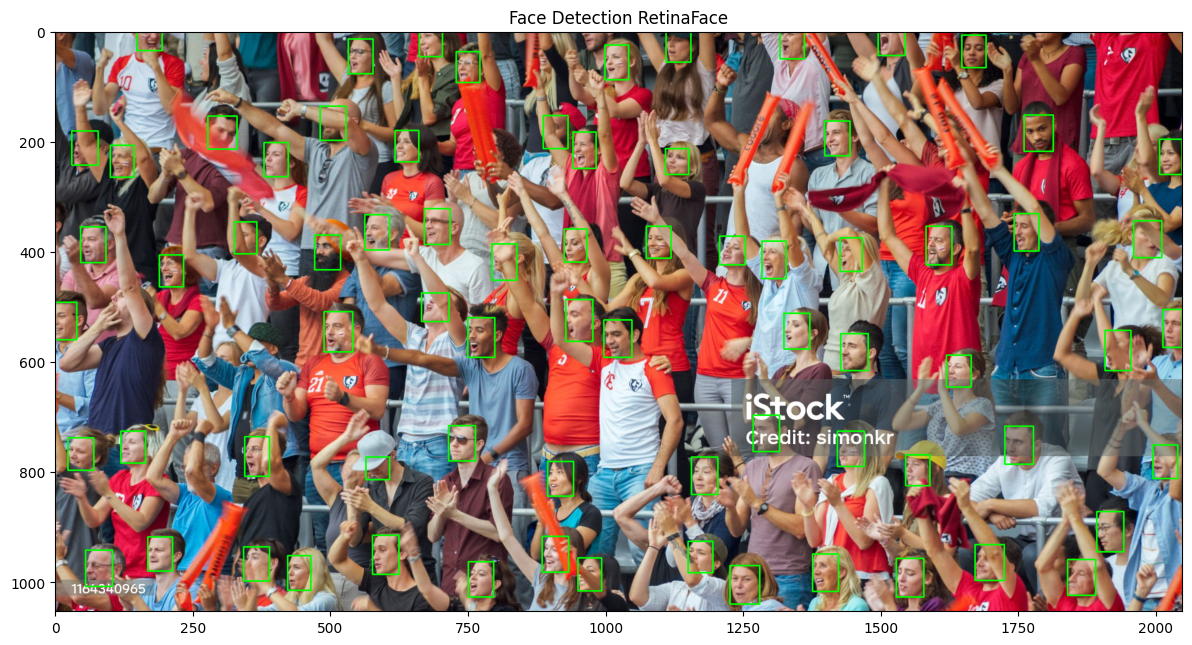

In [7]:
#imgpath:str = '../../sampledata/others/IMG_8812.jpg'
image = cv2.imread(imgpath)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convertir BGR a RGB para matplotlib

plt.figure(figsize=(32,32))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_with_boxes_dsfd)
plt.title('Face Detection DSFD ')
plt.axis('on')

#detectar los rostros usando RetinaFace
t = time.time()
faces = RetinaFace.detect_faces(imgpath)
print(f"Detection time: {time.time()- t:.3f} seconds")

#print(len(faces.keys()))
for key in faces.keys():
    face = faces[key]
    facialarea = face["facial_area"]
    cv2.rectangle(image, (facialarea[2],facialarea[3]), (facialarea[0],facialarea[1]), (0, 255, 0), 2)

# Convertir la imagen con las cajas delimitadoras a RGB para mostrarla con matplotlib
img_rgb_with_boxes_retina = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rostros detectados
plt.figure(figsize=(32,32))
plt.subplot(1, 2, 2)
plt.imshow(img_rgb_with_boxes_retina)
plt.title('Face Detection RetinaFace')
plt.axis('on')
plt.show()

Processing: ../minidataset/image015.jpg
Detection time: 50.869 seconds
Detection time: 11.164 seconds


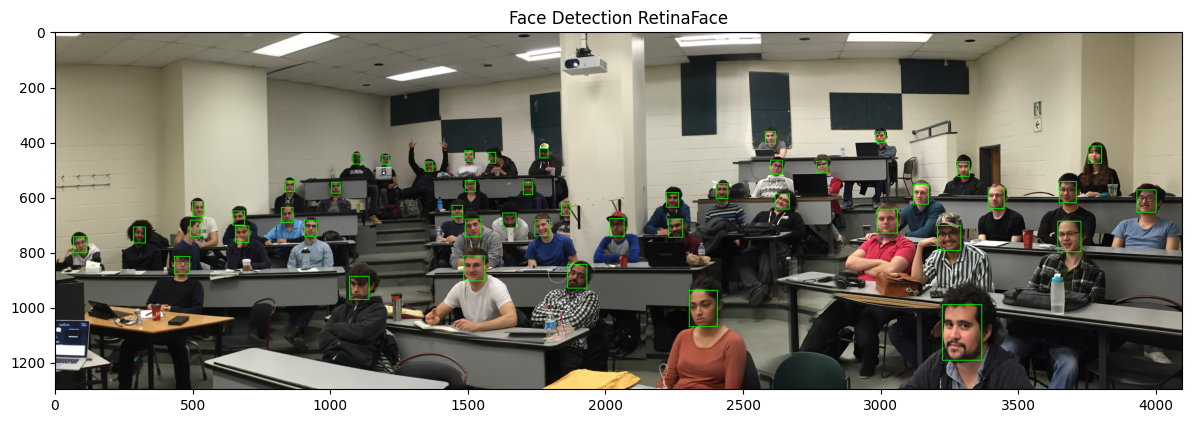

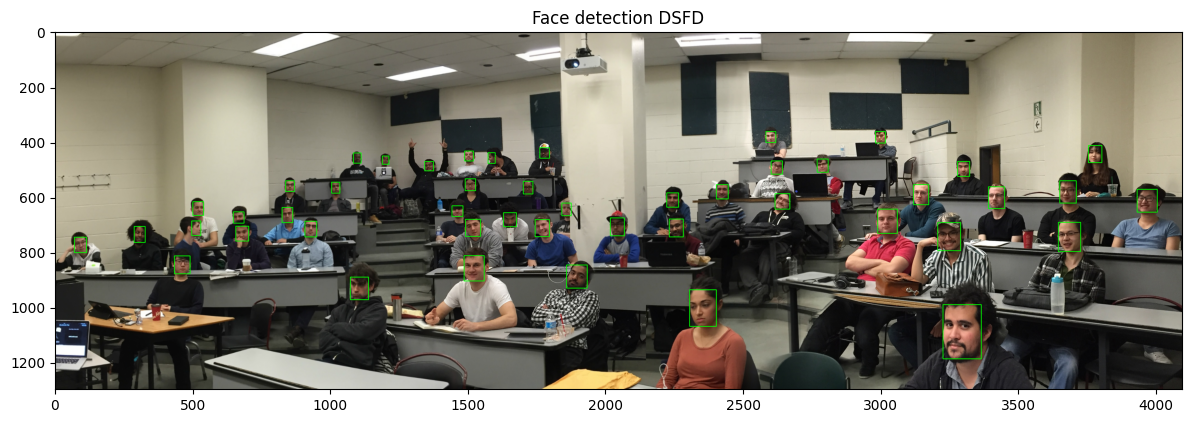

In [11]:

#-- Test DSFD

imgpath = '../minidataset/image015.jpg'
image = cv2.imread(imgpath)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

#construir el detector DSFD
detector = face_detection.build_detector(
    name="DSFDDetector",
    confidence_threshold= 0.5,
    nms_iou_threshold = 0.3,
    max_resolution = None,
    fp16_inference = False,
    clip_boxes = False
)

#detectar los rostros en la imagen
print("Processing:", imgpath)
t = time.time()
dets = detector.detect(image[:, :, ::-1])[:, :4]  # Detección
print(f"Detection time: {time.time()- t:.3f} seconds")

#dibujar las caras detectadas
for bbox in dets:
    x0, y0, x1, y1 = [int(_) for _ in bbox]
    cv2.rectangle(image, (x0, y0), (x1, y1), (0, 255, 0), 2)  # Color verde para las cajas

#convertir la imagen con las cajas delimitadoras a RGB para mostrarla con matplotlib
img_rgb_with_boxes_dsfd = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#-- Test RetinaFace

#detectar los rostros usando RetinaFace
image = cv2.imread(imgpath)
t1 = time.time()
faces = RetinaFace.detect_faces(imgpath)
print(f"Detection time: {time.time()- t1:.3f} seconds")

#print(len(faces.keys()))
for key in faces.keys():
    face = faces[key]
    facialarea = face["facial_area"]
    cv2.rectangle(image, (facialarea[2],facialarea[3]), (facialarea[0],facialarea[1]), (0, 255, 0), 2)

# Convertir la imagen con las cajas delimitadoras a RGB para mostrarla con matplotlib
img_rgb_with_boxes_retina = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rostros detectados

# Mostrar la imagen con los rostros detectados

plt.figure(figsize=(32,32))
plt.subplot(1, 2, 2)
plt.imshow(img_rgb_with_boxes_retina)
plt.title('Face Detection RetinaFace')
plt.axis('on')
plt.show()

plt.figure(figsize=(32,32))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_with_boxes_dsfd)
plt.title('Face detection DSFD')
plt.axis('on')
plt.show()